<a href="https://colab.research.google.com/github/MauBarcena/Examen_1_Mauricio_Barcena/blob/main/Examen_consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
from google.colab import files
files.upload()


Saving consumer.csv to consumer (1).csv


{'consumer.csv': b'"_record_id","_title","_server_updated_at","_updated_by","_geometry","_latitude","_longitude","282_payment_method_that_purchase","283_fulfill_needs","300_did_not_find","237_distance_household_interviewee","299_means_transportation_consumer","238_frequency_buying_store","284_additional_products_store","301_electricity_bill","305_electricity_bill_store","302_water_bill","306_water_bill_store","303_gas_bill","307_gas_bill_store","286_topups","308_topups_in_store","287_wire_transfers","309_wiretransfers_in_store","320_other_services_in_store","304_additional_services_store","81_number_online_purchases_month","288_number_app_purchases_month","289_number_whatsapp_purchases_month","83_willingness_ultrafast_delivery","84_willingness_sameday_delivery","241_age_of_the_interviewee","240_gender_interviewee","indicate_the_type_of_store","name_of_the_store","storefront_picture_just_once_if_possible"\n"060a856c-e3b8-41a7-b680-9756172d1c29","November 12, 2022","2022-11-12 22:43:08 U

In [ ]:
data=pd.read_csv('consumer.csv') #leemos los datos para una mejor interpretacion 

In [96]:
data.info() #desplegamos la información para observar las columnas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   _record_id                                115 non-null    object 
 1   _title                                    115 non-null    object 
 2   _server_updated_at                        115 non-null    object 
 3   _updated_by                               115 non-null    object 
 4   _geometry                                 115 non-null    object 
 5   _latitude                                 115 non-null    float64
 6   _longitude                                115 non-null    float64
 7   282_payment_method_that_purchase          115 non-null    object 
 8   283_fulfill_needs                         115 non-null    object 
 9   300_did_not_find                          6 non-null      object 
 10  237_distance_household_interviewee    

In [ ]:
valores_nulos=data.isnull().sum() #Checamos los valores nulos de todo nuestro data frame para trabajar con ellos 
valores_nulos

_record_id                                    0
_title                                        0
_server_updated_at                            0
_updated_by                                   0
_geometry                                     0
_latitude                                     0
_longitude                                    0
282_payment_method_that_purchase              0
283_fulfill_needs                             0
300_did_not_find                            109
237_distance_household_interviewee            0
299_means_transportation_consumer             0
238_frequency_buying_store                    0
284_additional_products_store               111
301_electricity_bill                          0
305_electricity_bill_store                    7
302_water_bill                                0
306_water_bill_store                          4
303_gas_bill                                  0
307_gas_bill_store                            3
286_topups                              

In [ ]:
data1=data.fillna(method='bfill') #eliminamos todos los valores nulos numéricos con el comando bfill para comenzar con el proceso de trabajo 
data1

In [ ]:
valores_nulos=data1.isnull().sum() #Una vez eliminados los nulos procedemos a checar de nuevo para observar como esta nuestro data rame 
valores_nulos

In [ ]:
data2=data1.copy()
data2=data2.fillna(round(data.mean(),1))
data2

In [ ]:
data2['300_did_not_find']=data2['300_did_not_find'].fillna(method='ffill')
data2['284_additional_products_store']=data2['284_additional_products_store'].fillna(method='ffill')
data2['304_additional_services_store']=data2['304_additional_services_store'].fillna(method='ffill')


In [ ]:
valores_nulos=data2.isnull().sum()
valores_nulos

<Figure size 1800x1296 with 0 Axes>

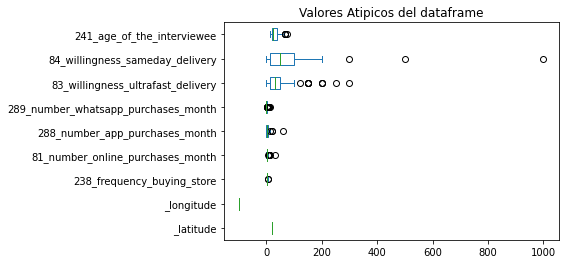

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(25,18))
data1.plot(kind='box',vert=False)
plt.title('Valores Atipicos del dataframe')
plt.show()

In [ ]:
y=data2['241_age_of_the_interviewee']
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 65.0
Limite inferior permitido -7.0


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr


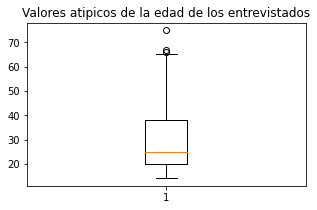

In [97]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['241_age_of_the_interviewee'])
plt.title('Valores atipicos de la edad de los entrevistados')
plt.show()

In [ ]:
y=data2['84_willingness_sameday_delivery']
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 231.25
Limite inferior permitido -118.75


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr

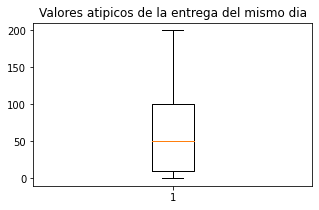

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['84_willingness_sameday_delivery'])
plt.title('Valores atipicos de la entrega del mismo dia')
plt.show()

In [ ]:
y=data2['83_willingness_ultrafast_delivery' ]
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 102.5
Limite inferior permitido -37.5


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr

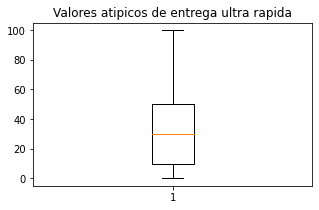

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['83_willingness_ultrafast_delivery'])
plt.title('Valores atipicos de entrega ultra rapida')
plt.show()

In [ ]:
y=data2['289_number_whatsapp_purchases_month' ]
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 2.5
Limite inferior permitido -1.5


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr

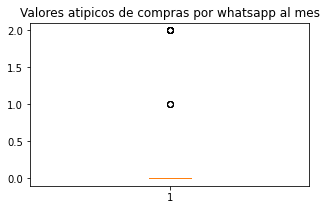

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['289_number_whatsapp_purchases_month'])
plt.title('Valores atipicos de compras por whatsapp al mes')
plt.show()

In [ ]:
y=data2['288_number_app_purchases_month' ]
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 12.5
Limite inferior permitido -7.5


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr

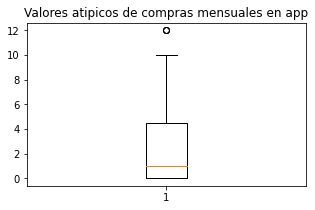

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['288_number_app_purchases_month'])
plt.title('Valores atipicos de compras mensuales en app')
plt.show()

In [ ]:
y=data2['81_number_online_purchases_month' ]
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 6.0
Limite inferior permitido -2.0


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr

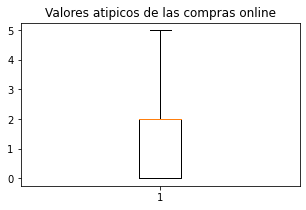

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['81_number_online_purchases_month'])
plt.title('Valores atipicos de las compras online')
plt.show()

In [ ]:
y=data2['238_frequency_buying_store' ]
p25=y.quantile(0.25)
p75=y.quantile(0.75)
iqr=p75-p25

lsi=p75+1.5*iqr
lii=p25-1.5*iqr

print('Limite superior permitido', lsi)
print('Limite inferior permitido', lii)

Limite superior permitido 6.0
Limite inferior permitido -2.0


In [ ]:
outliers_iqr=data2[(y>lsi)|(y<lii)] #encuentra los valores que se salen
outliers_iqr

In [ ]:
outliers1_iqr=data2[(y<lsi)&(y>lii)] #genera el data frame sin valores atipicos
outliers1_iqr

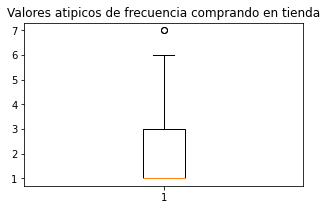

In [ ]:
#diagrama de caja de bigote de todo el data
fig=plt.figure(figsize=(5,3))
plt.boxplot(outliers1_iqr['238_frequency_buying_store'])
plt.title('Valores atipicos de frecuencia comprando en tienda')
plt.show()

In [ ]:
outliers1_iqr.to_csv('Examen_consumer.csv')

In [ ]:
from google.colab import files 
files.download('Examen_consumer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>